In [2]:
import numpy as np
import pandas as pd

import re

In [3]:
df = pd.read_csv("data/covid19_raw_data2.csv")

df.head()

country_other   totalcases totaldeaths totalrecovered activecases  \
0           USA  109,339,844   1,182,163    107,274,717     882,964   
1         India   45,001,510     533,295              0           0   
2        France   40,138,560     167,642     39,970,918           0   
3       Germany   38,603,958     177,576     38,240,600     185,782   
4        Brazil   38,022,277     707,286     36,249,161   1,065,830   

  serious_critical     totaltests     population      continent  
0            1,303  1,186,431,916    334,805,269  North America  
1                0    930,797,975  1,406,631,776           Asia  
2              869    271,490,188     65,584,518         Europe  
3                0    122,332,384     83,883,596         Europe  
4                0     63,776,166    215,353,593  South America

In [4]:
df

country_other   totalcases totaldeaths totalrecovered  \
0                      USA  109,339,844   1,182,163    107,274,717   
1                    India   45,001,510     533,295              0   
2                   France   40,138,560     167,642     39,970,918   
3                  Germany   38,603,958     177,576     38,240,600   
4                   Brazil   38,022,277     707,286     36,249,161   
..                     ...          ...         ...            ...   
218      Wallis and Futuna        3,550           8            438   
219  Saint Pierre Miquelon        3,452           2          2,449   
220                 Tuvalu        2,943           1              0   
221         Western Sahara           10           1              9   
222                  China      503,302       5,272        379,053   

    activecases serious_critical     totaltests     population  \
0       882,964            1,303  1,186,431,916    334,805,269   
1             0                0    930,797,975  1,406,631,776   
2             0              869    271,490,188     65,584,518   
3       185,782                0    122,332,384     83,883,596   
4     1,065,830                0     63,776,166    215,353,593   
..          ...              ...            ...            ...   
218       3,104                0         20,508         10,982   
219       1,001                1         25,400          5,759   
220       2,942                0              0         12,066   
221           0                0              0        626,161   
222     118,977                0    160,000,000  1,448,471,400   

             continent  
0        North America  
1                 Asia  
2               Europe  
3               Europe  
4        South America  
..                 ...  
218  Australia/Oceania  
219      North America  
220  Australia/Oceania  
221             Africa  
222               Asia  

[223 rows x 9 columns]

In [5]:
df.isnull().sum()

country_other       0
totalcases          0
totaldeaths         0
totalrecovered      0
activecases         0
serious_critical    0
totaltests          0
population          0
continent           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_other     223 non-null    object
 1   totalcases        223 non-null    object
 2   totaldeaths       223 non-null    object
 3   totalrecovered    223 non-null    object
 4   activecases       223 non-null    object
 5   serious_critical  223 non-null    object
 6   totaltests        223 non-null    object
 7   population        223 non-null    object
 8   continent         223 non-null    object
dtypes: object(9)
memory usage: 15.8+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.columns

Index(['country_other', 'totalcases', 'totaldeaths', 'totalrecovered',
       'activecases', 'serious_critical', 'totaltests', 'population',
       'continent'],
      dtype='object')

In [9]:
df['totalcases'] = df['totalcases'].replace(',', '', regex=True)

In [10]:
df['totaldeaths'] = df['totaldeaths'].replace(',', '', regex=True)

In [11]:
df['totalrecovered'] = df['totalrecovered'].replace(',', '', regex=True)

In [12]:
df['activecases'] = df['activecases'].replace(',', '', regex=True)

In [13]:
df['serious_critical'] = df['serious_critical'].replace(',', '', regex=True)

In [14]:
df['totaltests'] = df['totaltests'].replace(',', '', regex=True)

In [15]:
df['population'] = df['population'].replace(',', '', regex=True)

In [16]:
df

country_other totalcases totaldeaths totalrecovered activecases  \
0                      USA  109339844     1182163      107274717      882964   
1                    India   45001510      533295              0           0   
2                   France   40138560      167642       39970918           0   
3                  Germany   38603958      177576       38240600      185782   
4                   Brazil   38022277      707286       36249161     1065830   
..                     ...        ...         ...            ...         ...   
218      Wallis and Futuna       3550           8            438        3104   
219  Saint Pierre Miquelon       3452           2           2449        1001   
220                 Tuvalu       2943           1              0        2942   
221         Western Sahara         10           1              9           0   
222                  China     503302        5272         379053      118977   

    serious_critical  totaltests  population          continent  
0               1303  1186431916   334805269      North America  
1                  0   930797975  1406631776               Asia  
2                869   271490188    65584518             Europe  
3                  0   122332384    83883596             Europe  
4                  0    63776166   215353593      South America  
..               ...         ...         ...                ...  
218                0       20508       10982  Australia/Oceania  
219                1       25400        5759      North America  
220                0           0       12066  Australia/Oceania  
221                0           0      626161             Africa  
222                0   160000000  1448471400               Asia  

[223 rows x 9 columns]

In [17]:
# Assuming your DataFrame is named df
columns_to_convert = ['totalcases', 'totaldeaths', 'totalrecovered',
                      'activecases', 'serious_critical', 'totaltests', 'population']

# Convert specified columns to numeric data type
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# 'coerce' option is used to handle any non-numeric values by converting them to NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country_other     223 non-null    object
 1   totalcases        223 non-null    int64 
 2   totaldeaths       223 non-null    int64 
 3   totalrecovered    223 non-null    int64 
 4   activecases       223 non-null    int64 
 5   serious_critical  223 non-null    int64 
 6   totaltests        223 non-null    int64 
 7   population        223 non-null    int64 
 8   continent         223 non-null    object
dtypes: int64(7), object(2)
memory usage: 15.8+ KB


In [19]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [20]:
discrete_df.columns

Index(['country_other', 'continent'], dtype='object')

In [21]:
numerical_df.columns

Index(['totalcases', 'totaldeaths', 'totalrecovered', 'activecases',
       'serious_critical', 'totaltests', 'population'],
      dtype='object')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

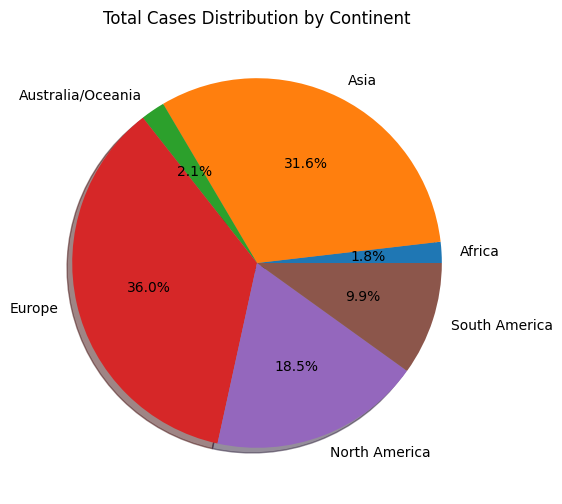

In [23]:
continent_totals = df.groupby('continent')['totalcases'].sum()

plt.figure(figsize=(8, 6))
plt.pie(continent_totals, labels=continent_totals.index, autopct='%1.1f%%', startangle=0,shadow=True)
plt.title('Total Cases Distribution by Continent')
plt.show()

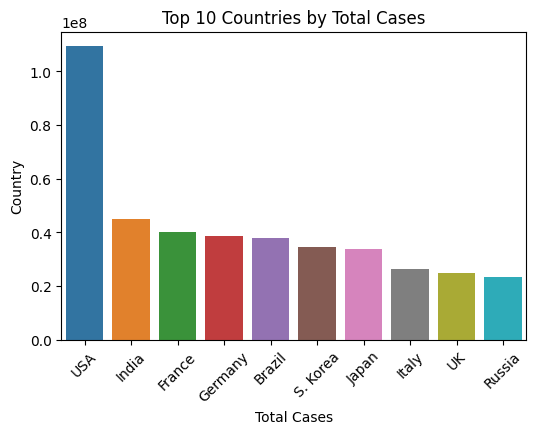

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(y='totalcases', x='country_other', data=df.nlargest(10, 'totalcases'))
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

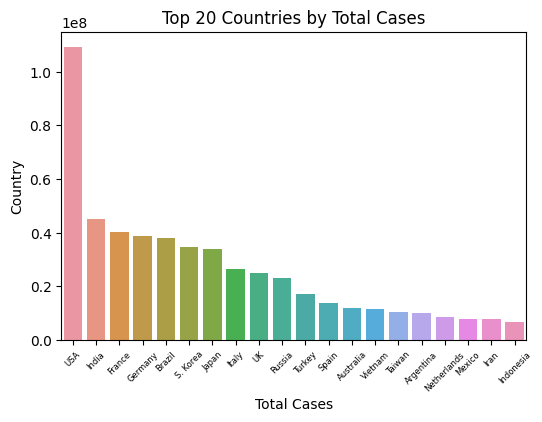

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(y='totalcases', x='country_other', data=df.nlargest(20, 'totalcases'))
plt.title('Top 20 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.xticks(rotation=45,fontsize=6)
plt.show()

           continent  totalcases
0             Africa    12842269
1               Asia   220872588
2  Australia/Oceania    14716653
3             Europe   251063753
4      North America   129163945
5      South America    69255674


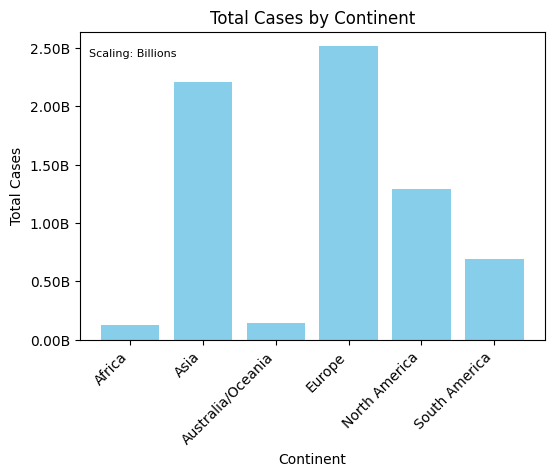

In [94]:
from matplotlib.ticker import FuncFormatter

grouped_data = df.groupby('continent')['totalcases'].sum().reset_index()

print(grouped_data)

plt.figure(figsize=(6,4))
plt.bar(grouped_data['continent'], grouped_data['totalcases'], color='skyblue')
plt.title('Total Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
#plt.yticks([0.0000000,0.5000000,1.0000000,1.5000000,2.0000000,2.5000000], ['0%','5%','10%','15%','20%','25%'])

def billions_formatter(x, pos):
    return f'{x/1e8:.2f}B'


plt.gca().yaxis.set_major_formatter(FuncFormatter(billions_formatter))
plt.text(0.02, 0.92, 'Scaling: Billions', transform=plt.gca().transAxes, fontsize=8, color='black')

plt.show()

           continent  totalcases
0             Africa    12842269
1               Asia   220872588
2  Australia/Oceania    14716653
3             Europe   251063753
4      North America   129163945
5      South America    69255674


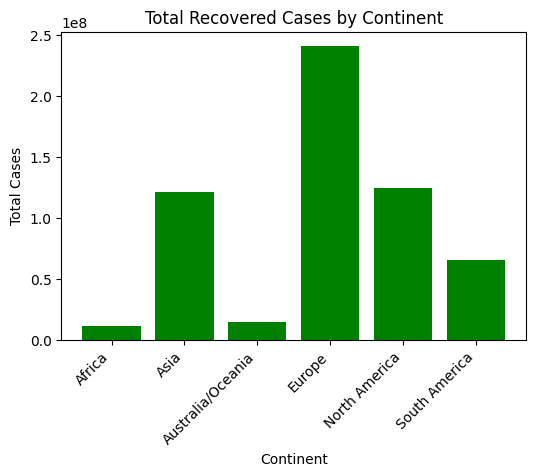

In [27]:
grouped_data1 = df.groupby('continent')['totalrecovered'].sum().reset_index()

print(grouped_data)

plt.figure(figsize=(6,4))
plt.bar(grouped_data['continent'], grouped_data1['totalrecovered'], color='green')
plt.title('Total Recovered Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

           continent  totalcases
0             Africa    12842269
1               Asia   220872588
2  Australia/Oceania    14716653
3             Europe   251063753
4      North America   129163945
5      South America    69255674


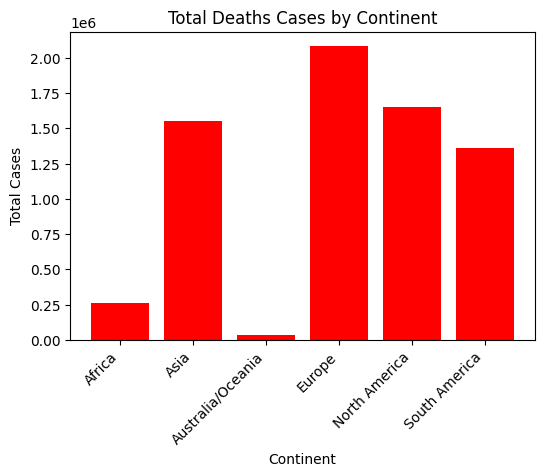

In [28]:
grouped_data2 = df.groupby('continent')['totaldeaths'].sum().reset_index()

print(grouped_data)

plt.figure(figsize=(6,4))
plt.bar(grouped_data['continent'], grouped_data2['totaldeaths'], color='red')
plt.title('Total Deaths Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

           continent  totalcases
0             Africa    12842269
1               Asia   220872588
2  Australia/Oceania    14716653
3             Europe   251063753
4      North America   129163945
5      South America    69255674


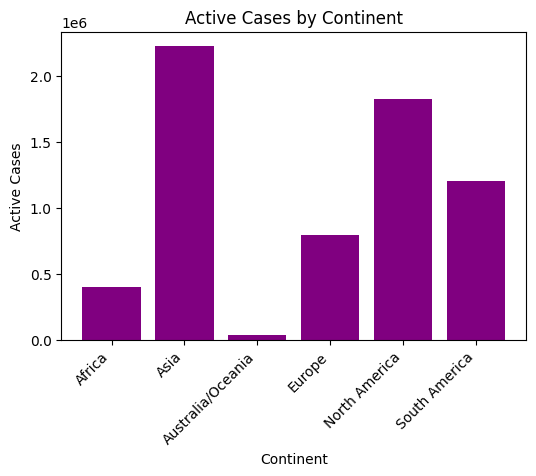

In [29]:
grouped_data3 = df.groupby('continent')['activecases'].sum().reset_index()

print(grouped_data)

plt.figure(figsize=(6,4))
plt.bar(grouped_data['continent'], grouped_data3['activecases'], color='purple')
plt.title('Active Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Active Cases')
plt.xticks(rotation=45, ha='right') 
plt.show()

           continent  totalcases
0             Africa    12842269
1               Asia   220872588
2  Australia/Oceania    14716653
3             Europe   251063753
4      North America   129163945
5      South America    69255674


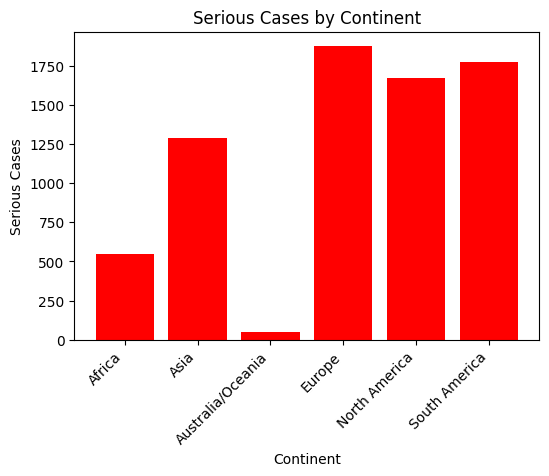

In [30]:
grouped_data4 = df.groupby('continent')['serious_critical'].sum().reset_index()

print(grouped_data)

plt.figure(figsize=(6,4))
plt.bar(grouped_data['continent'], grouped_data4['serious_critical'], color='red')
plt.title('Serious Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Serious Cases')
plt.xticks(rotation=45, ha='right') 
plt.show()

C:\Users\sunny\AppData\Local\Temp\ipykernel_24584\1404516740.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


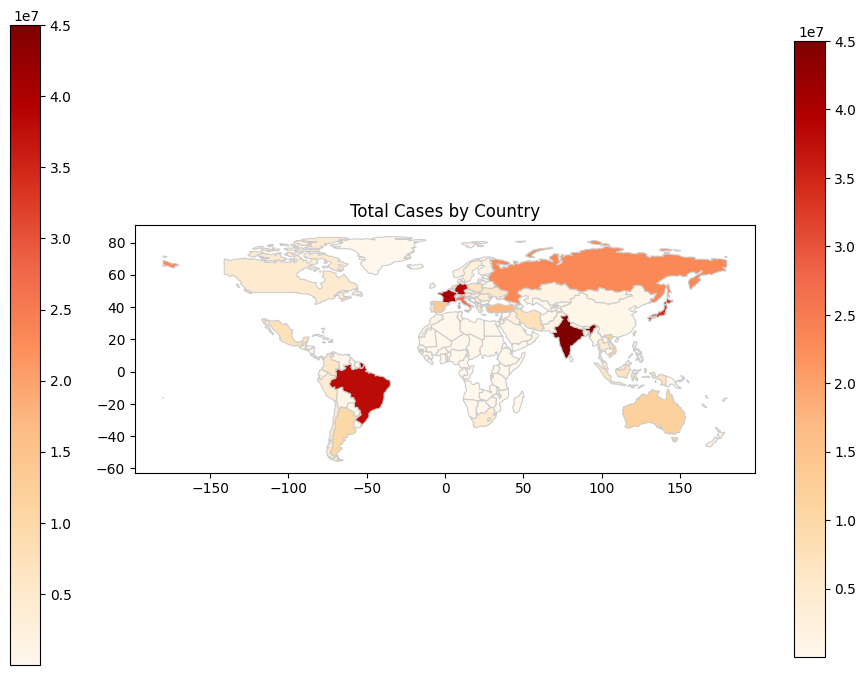

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named merged_df (result of merging discrete_df and numerical_df)
# and 'country_other' is in discrete_df and 'totalcases' is in numerical_df

# Load a world map shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map with your DataFrame
merged_map = world.merge(df, how='inner', left_on='name', right_on='country_other')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
merged_map.plot(column='totalcases', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Total Cases by Country')

# Add colorbar
cax = fig.add_axes([0, 0.1,0.03,0.8])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=merged_map['totalcases'].min(), vmax=merged_map['totalcases'].max()))
sm._A = []
fig.colorbar(sm, cax=cax)

plt.show()


In [32]:
import plotly.express as px

In [33]:
fig = px.scatter_geo(df, locations='country_other', size='totalcases', 
                     projection='natural earth', color='totalcases',
                     hover_name='country_other', size_max=40)

fig.update_geos(showcoastlines=True, coastlinecolor="black", showland=True, landcolor="lightgray")

fig.update_layout(title_text='Total Cases by Country')
fig.show()


In [34]:
import plotly.express as px

# Assuming your DataFrame is named df
fig = px.choropleth(df, 
                    locations='country_other',
                    locationmode='country names',
                    color='totalcases',
                    color_continuous_scale='OrRd',
                    title='Total Cases by Country')

fig.update_layout(geo=dict(showcoastlines=True))
fig.show()

C:\Users\sunny\AppData\Local\Temp\ipykernel_24584\3232671827.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



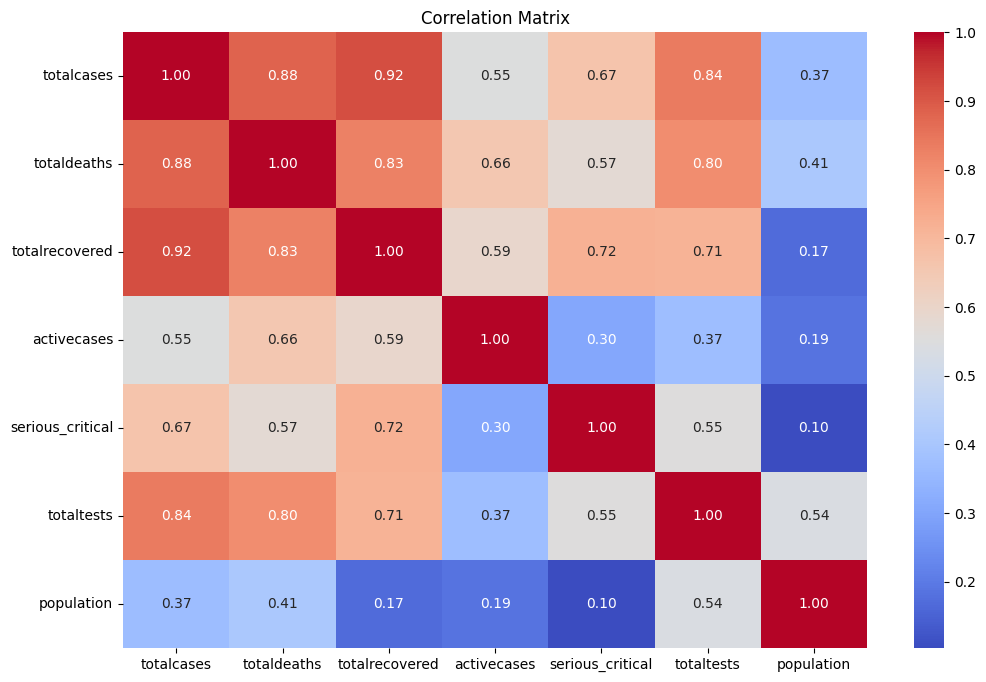

In [35]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

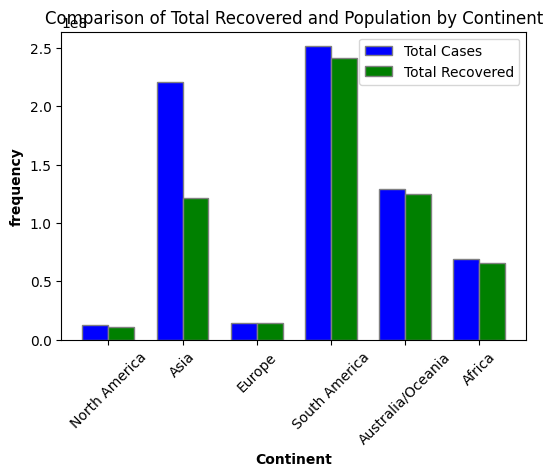

In [36]:
categories = df['continent'].unique()
totalcases_values = df.groupby('continent')['totalcases'].sum()
total_recored_values = df.groupby('continent')['totalrecovered'].sum()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(6,4))
plt.bar(r1, totalcases_values, color='blue', width=bar_width, edgecolor='grey', label='Total Cases')
plt.bar(r2, total_recored_values, color='green', width=bar_width, edgecolor='grey', label='Total Recovered')

# Add labels, title, and legend
plt.xlabel('Continent', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories,rotation=45)
plt.ylabel('frequency', fontweight='bold')
plt.title('Comparison of Total Recovered and Population by Continent')
plt.legend()

plt.show()

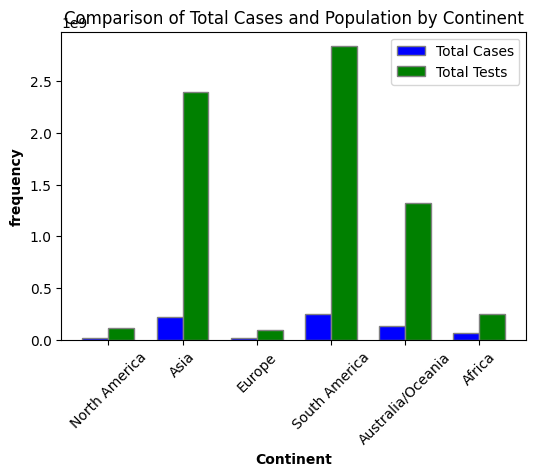

In [37]:
categories = df['continent'].unique()
totalcases_values = df.groupby('continent')['totalcases'].sum()
total_tests_values = df.groupby('continent')['totaltests'].sum()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(6,4))
plt.bar(r1, totalcases_values, color='blue', width=bar_width, edgecolor='grey', label='Total Cases')
plt.bar(r2, total_tests_values, color='green', width=bar_width, edgecolor='grey', label='Total Tests')

# Add labels, title, and legend
plt.xlabel('Continent', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories,rotation=45)
plt.ylabel('frequency', fontweight='bold')
plt.title('Comparison of Total Cases and Population by Continent')
plt.legend()

plt.show()

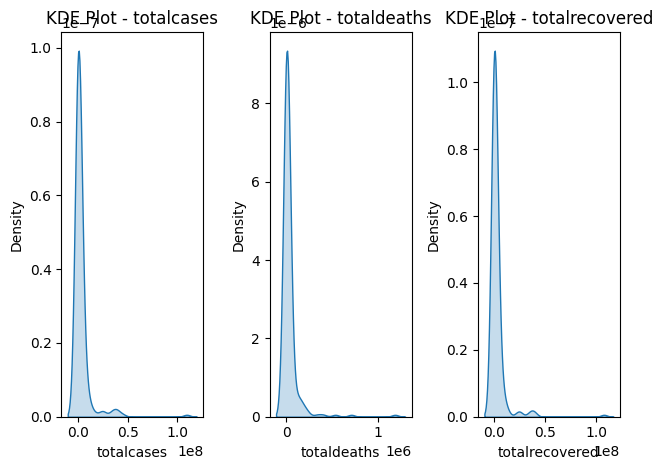

In [38]:
for i, column in enumerate(['totalcases', 'totaldeaths', 'totalrecovered']):
    plt.subplot(1, 3, i+1)
    sns.kdeplot(data=df, x=column, fill=True, common_norm=False)
    plt.title(f'KDE Plot - {column}')

plt.tight_layout()
plt.show()

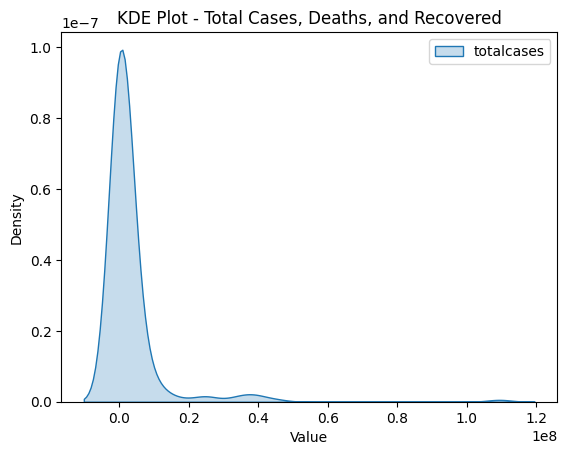

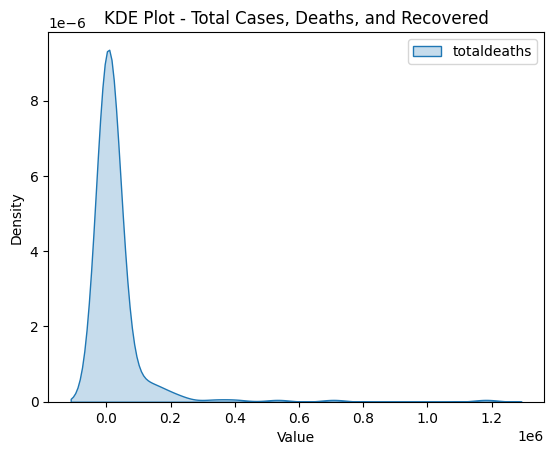

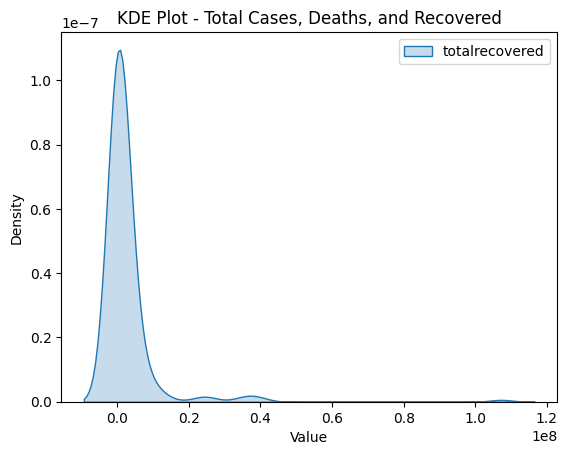

In [39]:
for column in ['totalcases', 'totaldeaths', 'totalrecovered']:
    sns.kdeplot(data=df, x=column, fill=True, common_norm=False, label=column)
    plt.title('KDE Plot - Total Cases, Deaths, and Recovered')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

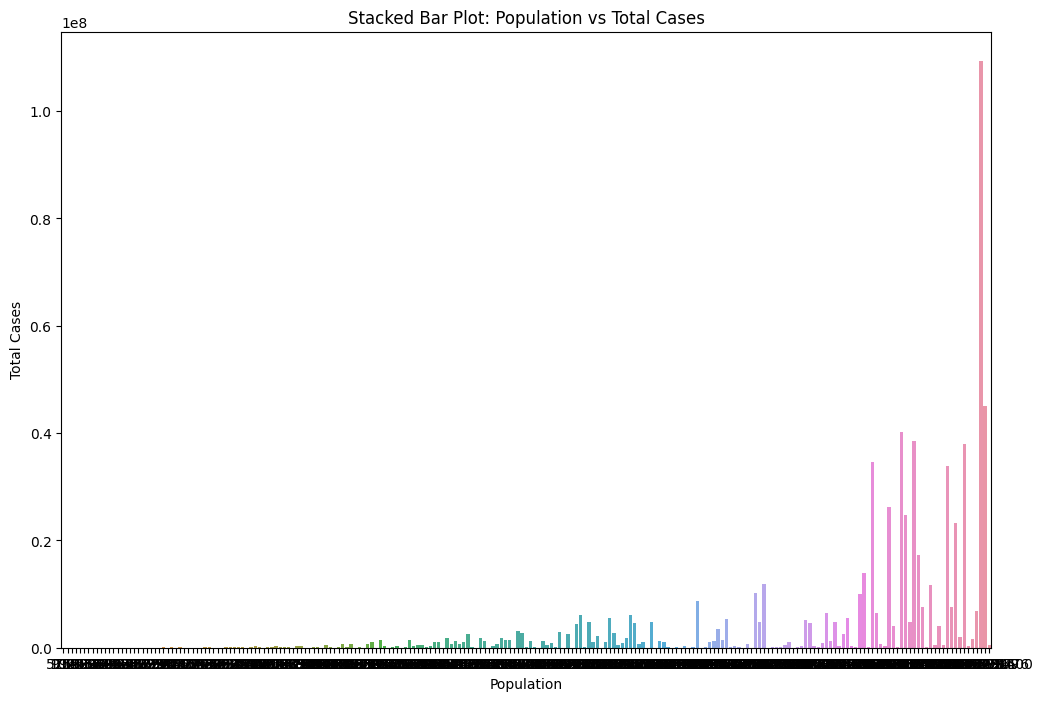

In [40]:
# Create a stacked bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='population', y='totalcases', data=df, errorbar=None)
plt.title('Stacked Bar Plot: Population vs Total Cases')
plt.xlabel('Population')
plt.ylabel('Total Cases')
plt.show()

In [41]:
df_agg = df.agg({'totalcases':['min','max','median','count'],
        'totaldeaths':['min','max','median','count'],
        'totalrecovered':['min','max','median','count'],
        'activecases':['min','max','median','count'],
        'serious_critical':['min','max','median','count'],
        'totaltests':['min','max','median','count'],
        'population':['min','max','median','count']
       })

In [42]:
df_agg

totalcases  totaldeaths  totalrecovered  activecases  \
min            10.0          1.0             0.0          0.0   
max     109339844.0    1182163.0     107274717.0    1065830.0   
median     230354.0       2249.0        132039.0        550.0   
count         223.0        223.0           223.0        223.0   

        serious_critical    totaltests    population  
min                  0.0  0.000000e+00  5.759000e+03  
max               1303.0  1.186432e+09  1.448471e+09  
median               1.0  1.941032e+06  6.550389e+06  
count              223.0  2.230000e+02  2.230000e+02

In [43]:
grouped_df = df.groupby('continent')

In [44]:
grouped_df.first()

country_other  totalcases  totaldeaths  totalrecovered  \
continent                                                                  
Africa             South Africa     4076463       102595         3912506   
Asia                      India    45001510       533295               0   
Australia/Oceania     Australia    11800893        22892        11769911   
Europe                   France    40138560       167642        39970918   
North America               USA   109339844      1182163       107274717   
South America            Brazil    38022277       707286        36249161   

                   activecases  serious_critical  totaltests  population  
continent                                                                 
Africa                   61362               192    26795090    60756135  
Asia                         0                 0   930797975  1406631776  
Australia/Oceania         8090                21    81916639    26068792  
Europe                       0               869   271490188    65584518  
North America           882964              1303  1186431916   334805269  
South America          1065830                 0    63776166   215353593

In [45]:
columns_to_agg = ['totalcases', 'totaldeaths', 'totalrecovered', 'activecases', 'serious_critical', 'totaltests', 'population']

In [46]:
grouped_agg_df = grouped_df[columns_to_agg].sum() / 1_000_000
grouped_agg_df = grouped_agg_df.round()

In [47]:
grouped_agg_df

totalcases  totaldeaths  totalrecovered  activecases  \
continent                                                                 
Africa                   13.0          0.0            11.0          0.0   
Asia                    221.0          2.0           122.0          2.0   
Australia/Oceania        15.0          0.0            15.0          0.0   
Europe                  251.0          2.0           241.0          1.0   
North America           129.0          2.0           125.0          2.0   
South America            69.0          1.0            66.0          1.0   

                   serious_critical  totaltests  population  
continent                                                    
Africa                          0.0       111.0      1407.0  
Asia                            0.0      2399.0      4711.0  
Australia/Oceania               0.0        92.0        43.0  
Europe                          0.0      2837.0       748.0  
North America                   0.0      1325.0       598.0  
South America                   0.0       245.0       438.0

In [48]:
grouped_df.last()

country_other  totalcases  totaldeaths  \
continent                                                           
Africa                    Western Sahara          10            1   
Asia                               China      503302         5272   
Australia/Oceania                 Tuvalu        2943            1   
Europe                            Monaco       17109           67   
North America      Saint Pierre Miquelon        3452            2   
South America                     Guyana       73388         1299   

                   totalrecovered  activecases  serious_critical  totaltests  \
continent                                                                      
Africa                          9            0                 0           0   
Asia                       379053       118977                 0   160000000   
Australia/Oceania               0         2942                 0           0   
Europe                      15992         1050                 4       78646   
North America                2449         1001                 1       25400   
South America               72013           76                 0      733218   

                   population  
continent                      
Africa                 626161  
Asia               1448471400  
Australia/Oceania       12066  
Europe                  39783  
North America            5759  
South America          794045

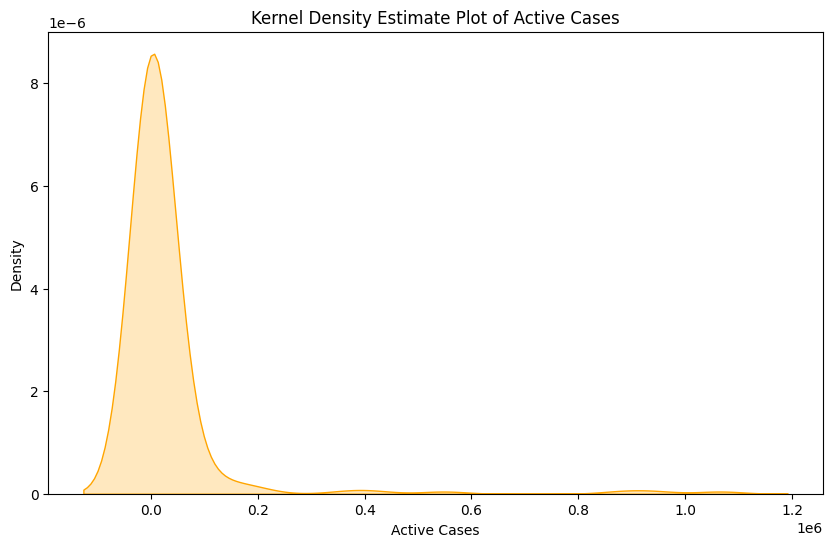

In [49]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['activecases'], fill=True, color='orange')
plt.title('Kernel Density Estimate Plot of Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Density')
plt.show()

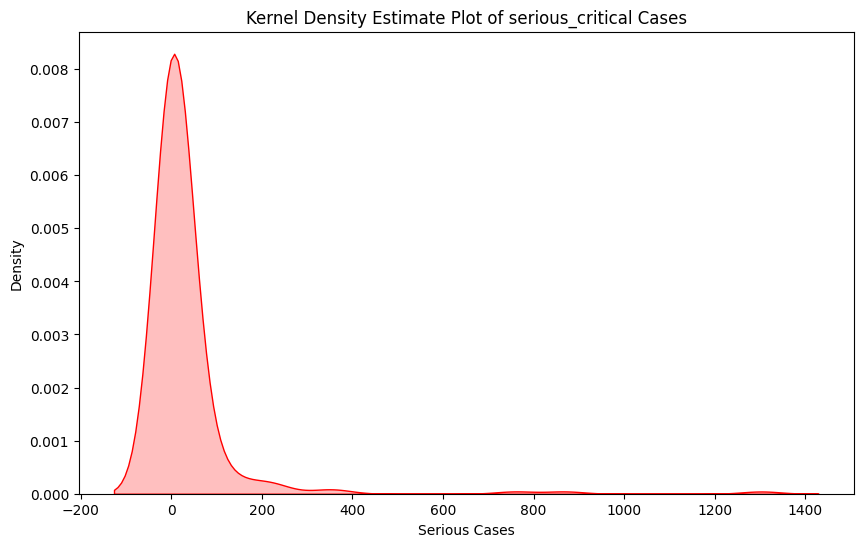

In [50]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['serious_critical'], fill=True, color='red')
plt.title('Kernel Density Estimate Plot of serious_critical Cases')
plt.xlabel('Serious Cases')
plt.ylabel('Density')
plt.show()

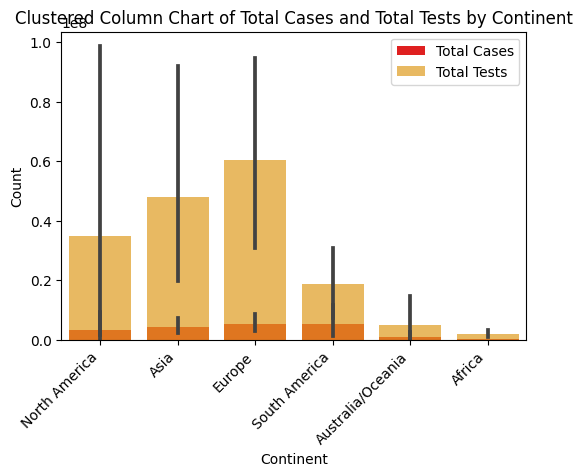

In [51]:
plt.figure(figsize=(6,4))

# Create a clustered bar plot
sns.barplot(x='continent', y='totalcases', data=df, color='red', label='Total Cases')
sns.barplot(x='continent', y='totaltests', data=df, color='orange', label='Total Tests',alpha=0.7)

# Add labels and title
plt.title('Clustered Column Chart of Total Cases and Total Tests by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')

plt.show()

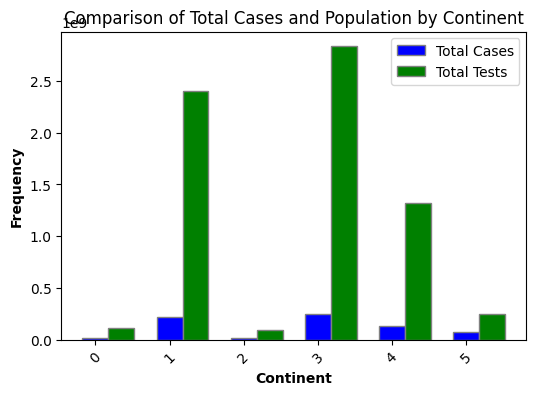

In [52]:
categories = df['continent'].unique()
totalcases_values = df.groupby('continent')['totalcases'].sum()
totaltests_values = df.groupby('continent')['totaltests'].sum()

#Set the width of the bars
bar_width = 0.35

#Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

#Create the bar plot
plt.figure(figsize=(6,4))
plt.bar(r1, totalcases_values, color='blue', width=bar_width, edgecolor='grey', label='Total Cases')
plt.bar(r2, totaltests_values, color='green', width=bar_width, edgecolor='grey', label='Total Tests')

#Add labels, title, and legend
plt.xlabel('Continent', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Frequency', fontweight='bold')
plt.title('Comparison of Total Cases and Population by Continent')
plt.legend()

plt.show()

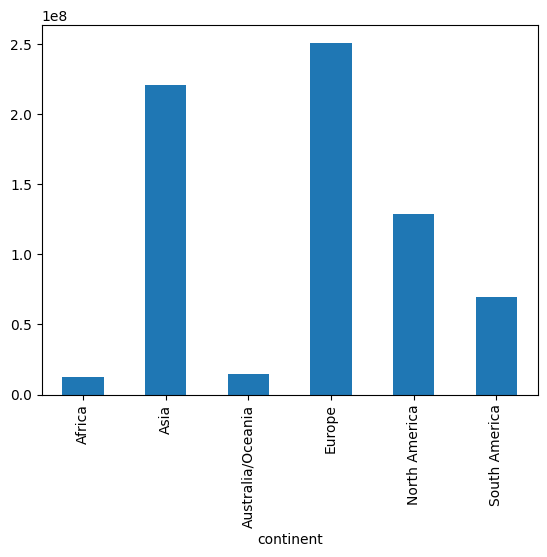

In [53]:
totalcases = df.groupby('continent')['totalcases'].sum()

totalcases.plot(kind='bar')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Australia/Oceania'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South America')])

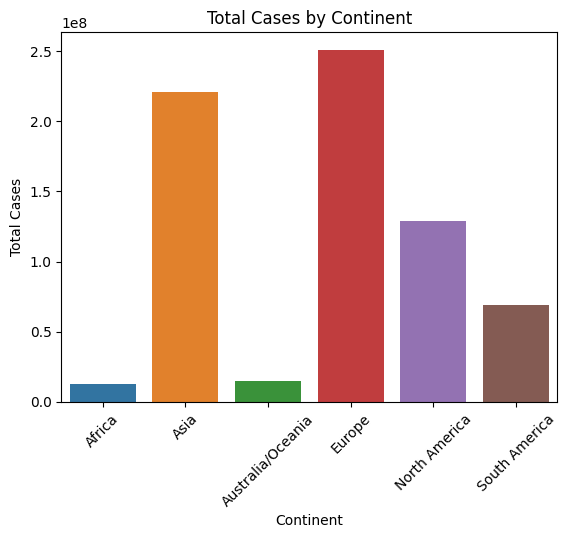

In [54]:
totalcases = df.groupby('continent')['totalcases'].sum().reset_index()

sns.barplot(x='continent', y='totalcases', data=totalcases)
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.title('Total Cases by Continent')
plt.xticks(rotation=45)

In [55]:
totalcases

continent  totalcases
0             Africa    12842269
1               Asia   220872588
2  Australia/Oceania    14716653
3             Europe   251063753
4      North America   129163945
5      South America    69255674

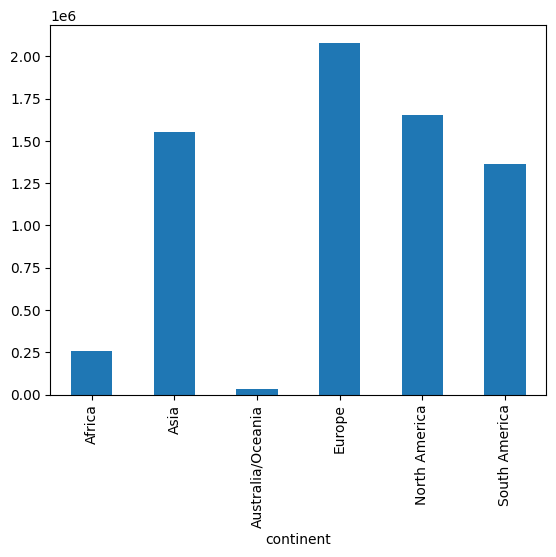

In [56]:
total_deaths = df.groupby('continent')['totaldeaths'].sum()

total_deaths.plot(kind='bar')

plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Australia/Oceania'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South America')])

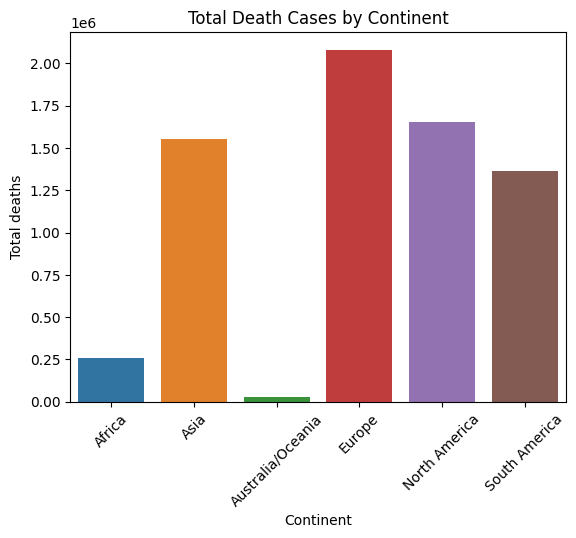

In [57]:
totalcases = df.groupby('continent')['totaldeaths'].sum().reset_index()

sns.barplot(x='continent', y='totaldeaths', data=totalcases)
plt.xlabel('Continent')
plt.ylabel('Total deaths')
plt.title('Total Death Cases by Continent')
plt.xticks(rotation=45)

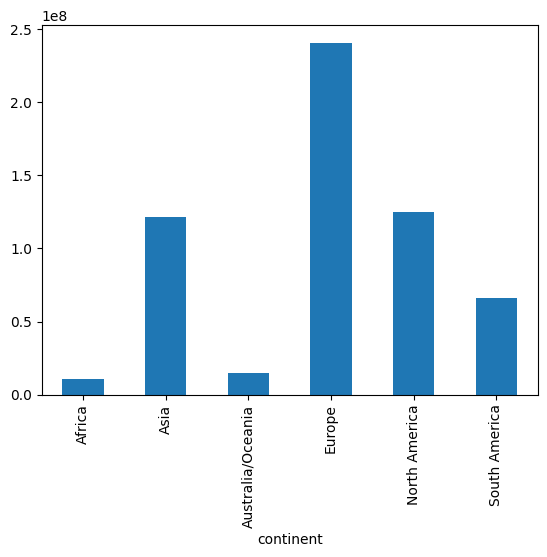

In [58]:
total_deaths = df.groupby('continent')['totalrecovered'].sum()

total_deaths.plot(kind='bar')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Africa'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Australia/Oceania'),
  Text(3, 0, 'Europe'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South America')])

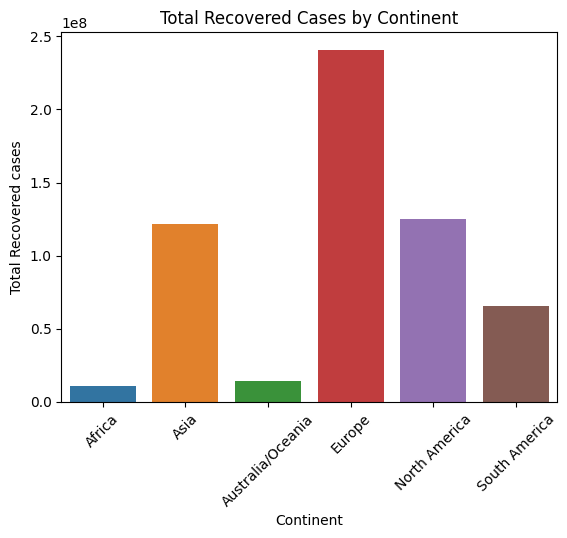

In [59]:
totalcases = df.groupby('continent')['totalrecovered'].sum().reset_index()

sns.barplot(x='continent', y='totalrecovered', data=totalcases)
plt.xlabel('Continent')
plt.ylabel('Total Recovered cases')
plt.title('Total Recovered Cases by Continent')
plt.xticks(rotation=45)

In [60]:
df.columns

Index(['country_other', 'totalcases', 'totaldeaths', 'totalrecovered',
       'activecases', 'serious_critical', 'totaltests', 'population',
       'continent'],
      dtype='object')

In [61]:
continent_totals

continent
Africa                12842269
Asia                 220872588
Australia/Oceania     14716653
Europe               251063753
North America        129163945
South America         69255674
Name: totalcases, dtype: int64

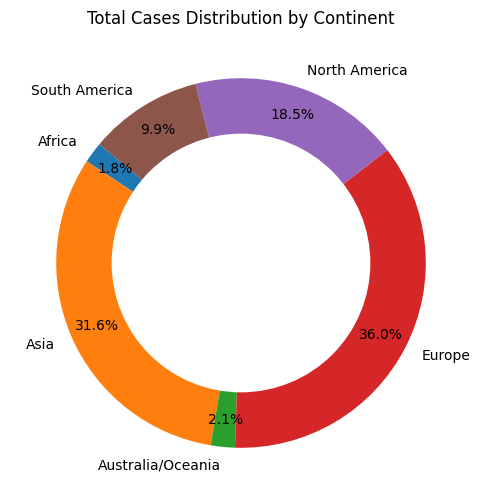

In [62]:
# Assuming continent_totals is a pandas Series with continent names as index and total cases as values
continent_totals = df.groupby('continent')['totalcases'].sum()

plt.figure(figsize=(8, 6))
plt.pie(continent_totals, labels=continent_totals.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Total Cases Distribution by Continent')

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

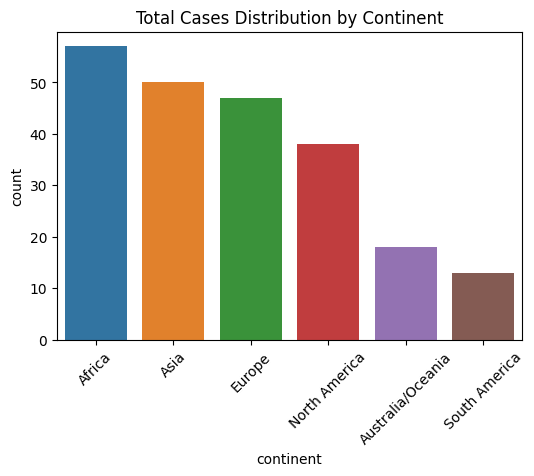

In [63]:
continent_totals = df.groupby('continent')['totalcases'].sum()

plt.figure(figsize=(6, 4))
sns.countplot(x="continent",data=df,order=df["continent"].value_counts().index)
plt.title('Total Cases Distribution by Continent')
plt.xticks(rotation=45)
plt.show()

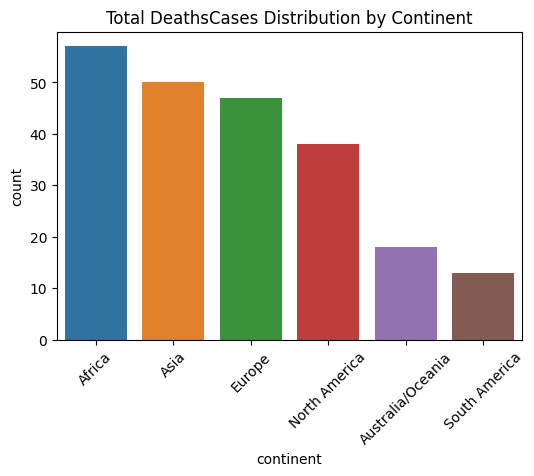

In [64]:
# continent_totals = df.groupby('continent')['totaldeaths'].sum()

plt.figure(figsize=(6, 4))
sns.countplot(x="continent",data=df,order=df["continent"].value_counts().index)
plt.title('Total DeathsCases Distribution by Continent')
plt.xticks(rotation=45)
plt.show()

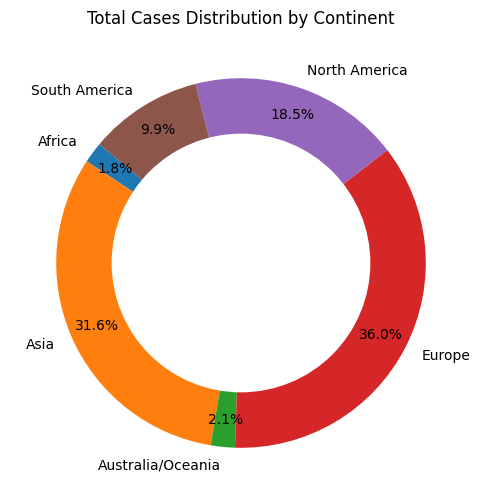

In [65]:
# Assuming continent_totals is a pandas Series with continent names as index and total cases as values
continent_totals = df.groupby('continent')['totalcases'].sum()

plt.figure(figsize=(8, 6))
plt.pie(continent_totals, labels=continent_totals.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Total Cases Distribution by Continent')

# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

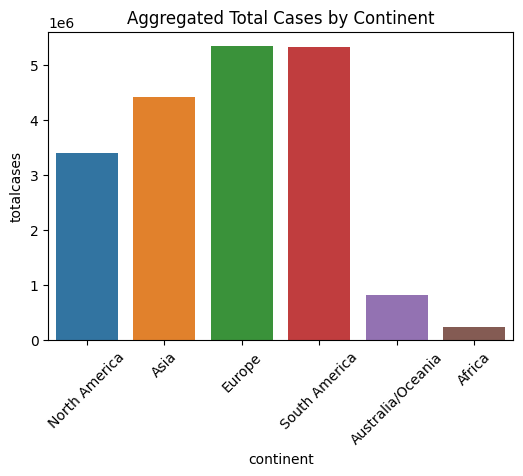

In [66]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='continent', y='totalcases',errorbar=None)
plt.title('Aggregated Total Cases by Continent')
plt.xticks(rotation=45)
plt.show()

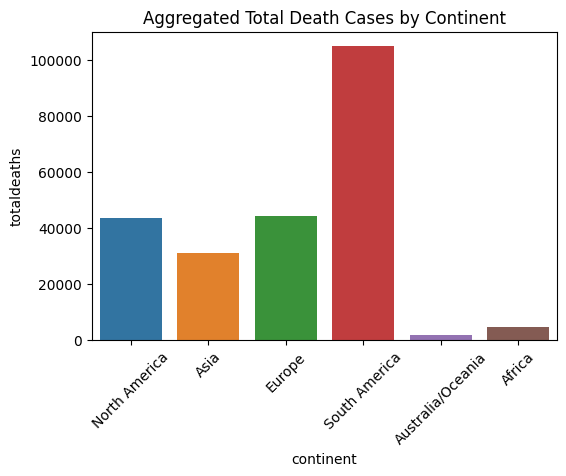

In [67]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='continent', y='totaldeaths', errorbar=None)
plt.title('Aggregated Total Death Cases by Continent')
plt.xticks(rotation=45)
plt.show()

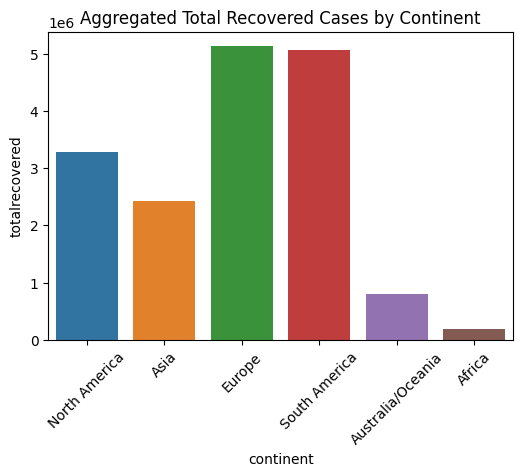

In [68]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='continent', y='totalrecovered', errorbar=None)
plt.title('Aggregated Total Recovered Cases by Continent')
plt.xticks(rotation=45)
plt.show()

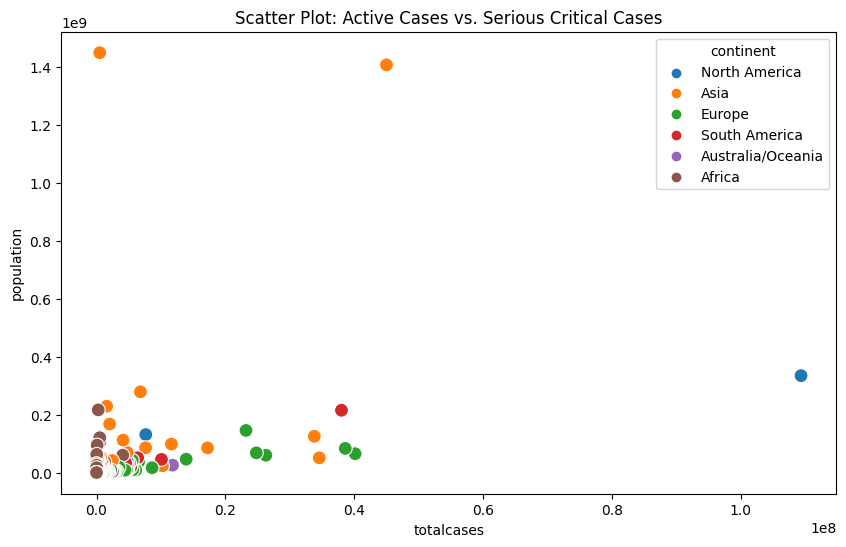

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='totalcases', y='population', hue='continent', s=100)
plt.title('Scatter Plot: Active Cases vs. Serious Critical Cases')
plt.xlabel('totalcases')
plt.ylabel('population')
plt.show()

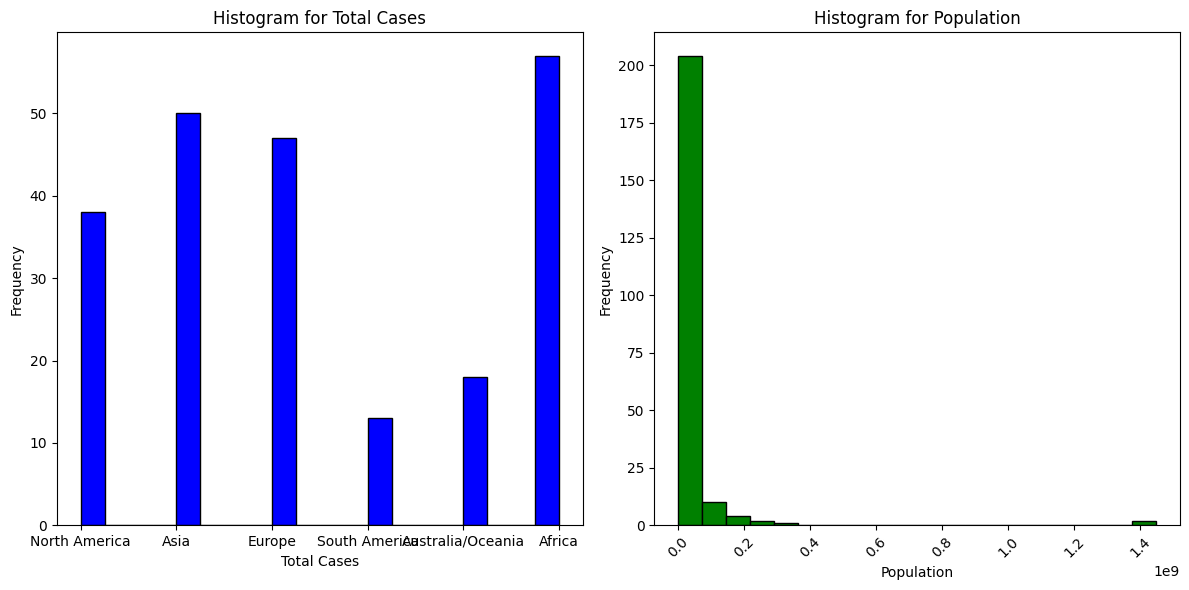

In [70]:
plt.figure(figsize=(12, 6))

# Histogram for 'totalcases'
plt.subplot(1, 2, 1)
plt.hist(df['continent'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram for Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')

# Histogram for 'population'
plt.subplot(1, 2, 2)
plt.hist(df['population'], bins=20, color='green', edgecolor='black')
plt.title('Histogram for Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

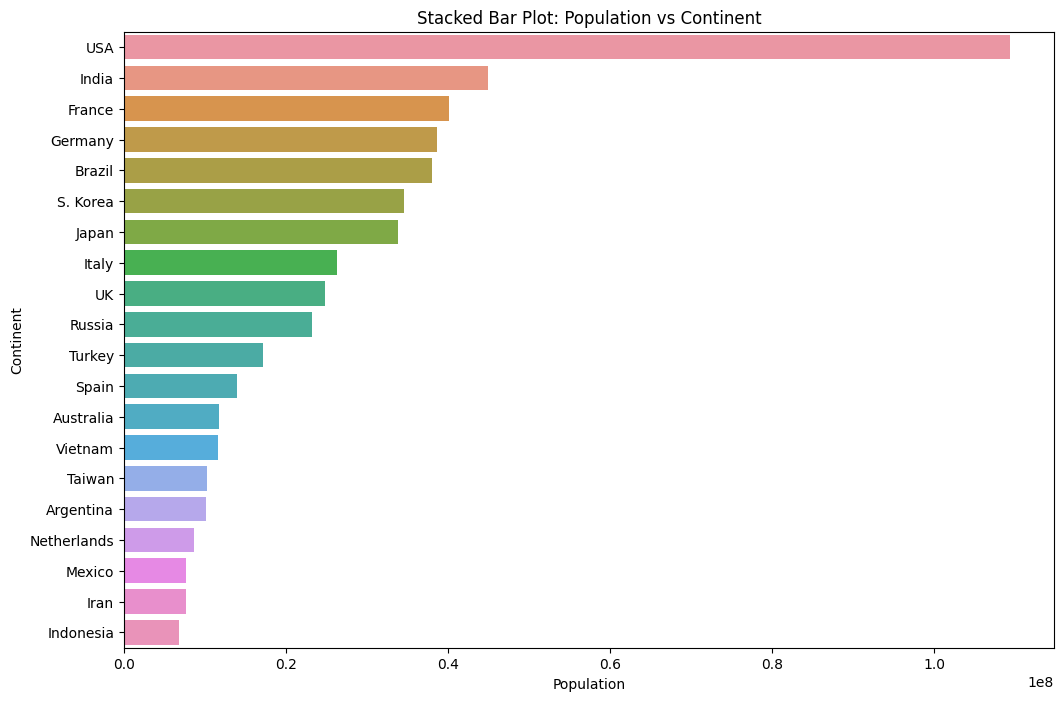

In [71]:
plt.figure(figsize=(12, 8))
sns.barplot(y='country_other', x='totalcases',data=df.nlargest(20, 'totalcases'), errorbar=None)
plt.title('Stacked Bar Plot: Population vs Continent')
plt.xlabel('Population')
plt.ylabel('Continent')
plt.show()

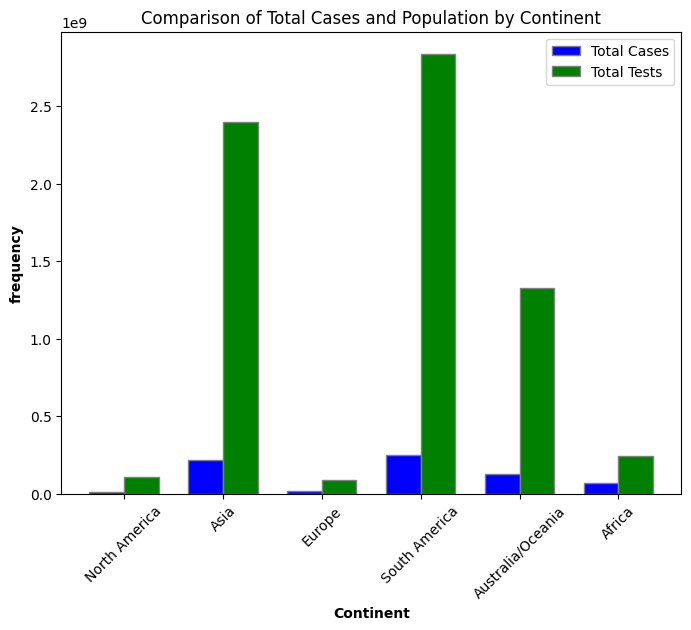

In [72]:
categories = df['continent'].unique()
totalcases_values = df.groupby('continent')['totalcases'].sum()
population_values = df.groupby('continent')['totaltests'].sum()

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(categories))
r2 = [x + bar_width for x in r1]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(r1, totalcases_values, color='blue', width=bar_width, edgecolor='grey', label='Total Cases')
plt.bar(r2, population_values, color='green', width=bar_width, edgecolor='grey', label='Total Tests')

# Add labels, title, and legend
plt.xlabel('Continent', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)
plt.ylabel('frequency', fontweight='bold')
plt.title('Comparison of Total Cases and Population by Continent')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [73]:
df['death_rate_(%)'] = df['totaldeaths'] / df['totalcases'] * 100

In [74]:
df['recovery_rate_(%)'] = df['totalrecovered'] / df['totalcases'] * 100


In [75]:
df['active_case_rate_(%)'] = df['activecases'] / df['totalcases'] * 100


In [76]:
def calculate_seriousness_score(country):
    # Calculate the severity score based on the mortality rate and case rate
    severity_score = (country['totaldeaths'] / country['totalcases']) * 100
    
 # Assign a seriousness rating based on the severity score
    if severity_score <= 1:
        seriousness_rating = 'Low'
    elif severity_score <= 2.5:
        seriousness_rating = 'Moderate'
    elif severity_score <= 5:
        seriousness_rating = 'High'
    else:
        seriousness_rating = 'Very High'

    return seriousness_rating

df['Seriousness'] = df.apply(calculate_seriousness_score, axis=1)


In [77]:
df['totaldeaths'].sum()

6938966

In [78]:
#df.to_csv('covid19_raw_data3.csv', index = False)

In [79]:
df.columns

Index(['country_other', 'totalcases', 'totaldeaths', 'totalrecovered',
       'activecases', 'serious_critical', 'totaltests', 'population',
       'continent', 'death_rate_(%)', 'recovery_rate_(%)',
       'active_case_rate_(%)', 'Seriousness'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country_other         223 non-null    object 
 1   totalcases            223 non-null    int64  
 2   totaldeaths           223 non-null    int64  
 3   totalrecovered        223 non-null    int64  
 4   activecases           223 non-null    int64  
 5   serious_critical      223 non-null    int64  
 6   totaltests            223 non-null    int64  
 7   population            223 non-null    int64  
 8   continent             223 non-null    object 
 9   death_rate_(%)        223 non-null    float64
 10  recovery_rate_(%)     223 non-null    float64
 11  active_case_rate_(%)  223 non-null    float64
 12  Seriousness           223 non-null    object 
dtypes: float64(3), int64(7), object(3)
memory usage: 22.8+ KB


In [81]:
df

country_other  totalcases  totaldeaths  totalrecovered  \
0                      USA   109339844      1182163       107274717   
1                    India    45001510       533295               0   
2                   France    40138560       167642        39970918   
3                  Germany    38603958       177576        38240600   
4                   Brazil    38022277       707286        36249161   
..                     ...         ...          ...             ...   
218      Wallis and Futuna        3550            8             438   
219  Saint Pierre Miquelon        3452            2            2449   
220                 Tuvalu        2943            1               0   
221         Western Sahara          10            1               9   
222                  China      503302         5272          379053   

     activecases  serious_critical  totaltests  population          continent  \
0         882964              1303  1186431916   334805269      North America   
1              0                 0   930797975  1406631776               Asia   
2              0               869   271490188    65584518             Europe   
3         185782                 0   122332384    83883596             Europe   
4        1065830                 0    63776166   215353593      South America   
..           ...               ...         ...         ...                ...   
218         3104                 0       20508       10982  Australia/Oceania   
219         1001                 1       25400        5759      North America   
220         2942                 0           0       12066  Australia/Oceania   
221            0                 0           0      626161             Africa   
222       118977                 0   160000000  1448471400               Asia   

     death_rate_(%)  recovery_rate_(%)  active_case_rate_(%) Seriousness  
0          1.081182          98.111277              0.807541    Moderate  
1          1.185060           0.000000              0.000000    Moderate  
2          0.417658          99.582342              0.000000         Low  
3          0.459994          99.058755              0.481251         Low  
4          1.860188          95.336639              2.803172    Moderate  
..              ...                ...                   ...         ...  
218        0.225352          12.338028             87.436620         Low  
219        0.057937          70.944380             28.997683         Low  
220        0.033979           0.000000             99.966021         Low  
221       10.000000          90.000000              0.000000   Very High  
222        1.047482          75.313231             23.639286    Moderate  

[223 rows x 13 columns]

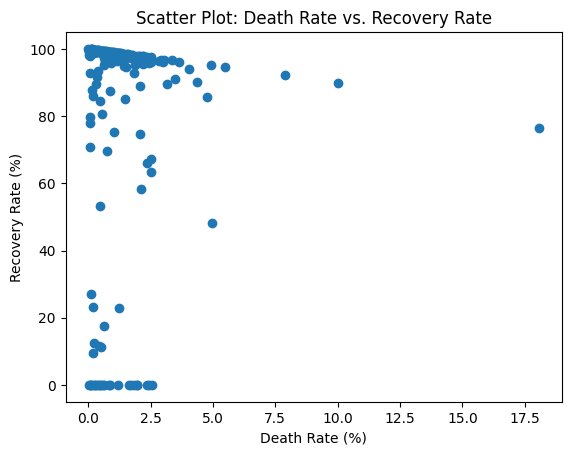

In [82]:
import matplotlib.pyplot as plt

plt.scatter(df['death_rate_(%)'], df['recovery_rate_(%)'])
plt.xlabel('Death Rate (%)')
plt.ylabel('Recovery Rate (%)')
plt.title('Scatter Plot: Death Rate vs. Recovery Rate')
plt.show()


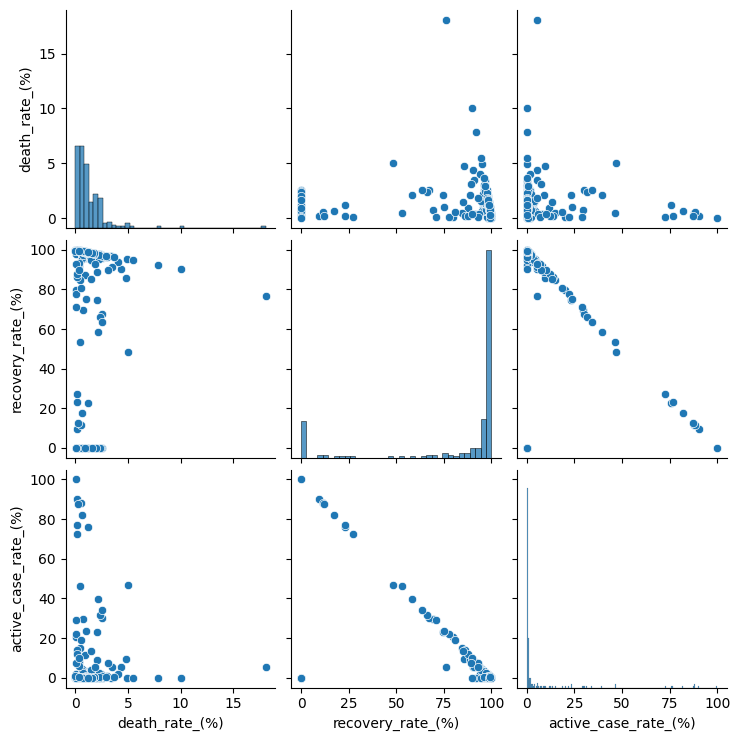

In [83]:
import seaborn as sns

sns.pairplot(df[['death_rate_(%)', 'recovery_rate_(%)', 'active_case_rate_(%)', 'Seriousness']])
plt.show()


C:\Users\sunny\AppData\Local\Temp\ipykernel_24584\2493249531.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



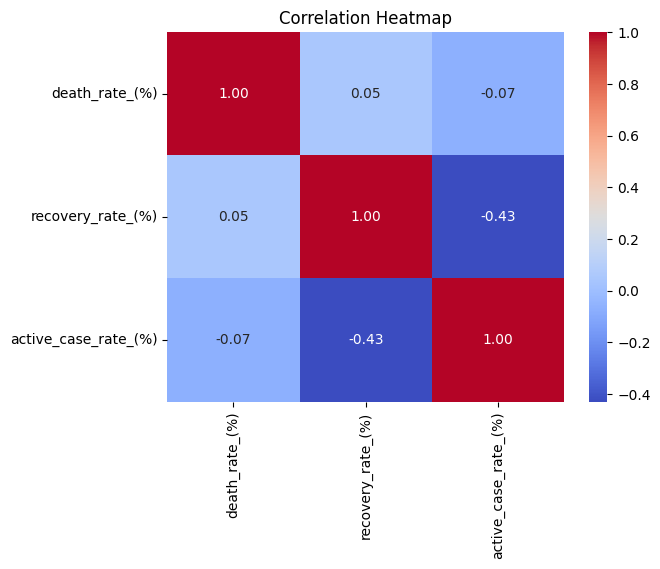

In [84]:
correlation_matrix = df[['death_rate_(%)', 'recovery_rate_(%)', 'active_case_rate_(%)', 'Seriousness']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


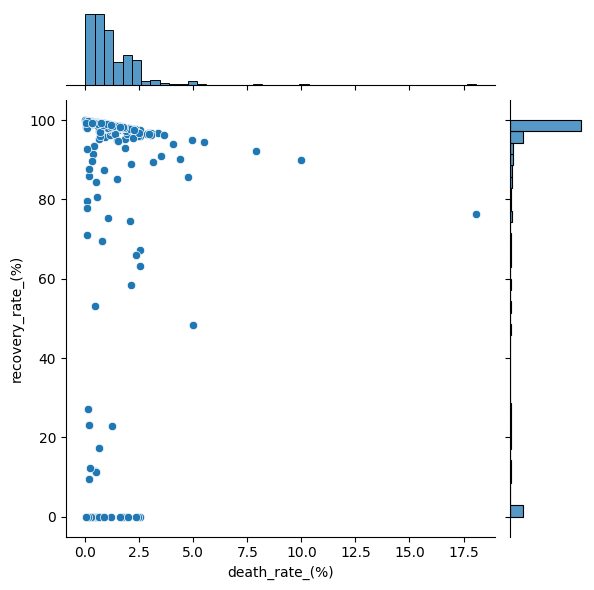

In [85]:
sns.jointplot(x='death_rate_(%)', y='recovery_rate_(%)', data=df, kind='scatter')
plt.show()


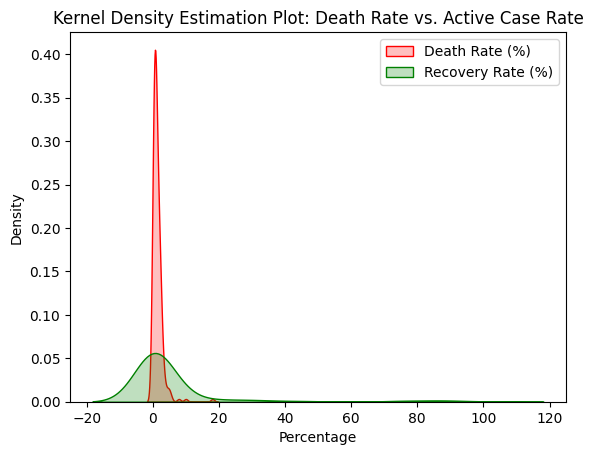

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
sns.kdeplot(data=df, x='death_rate_(%)', label='Death Rate (%)', fill=True,color = 'red')
sns.kdeplot(data=df, x='active_case_rate_(%)', label='Recovery Rate (%)', fill=True,color = 'green')

plt.title('Kernel Density Estimation Plot: Death Rate vs. Active Case Rate')
plt.xlabel('Percentage')
plt.ylabel('Density')
plt.legend()
plt.show()


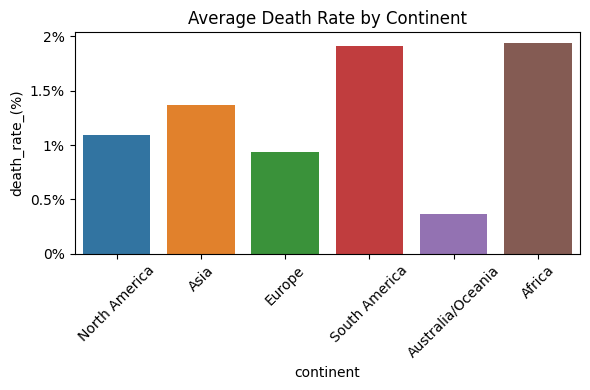

In [87]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='continent', y='death_rate_(%)',errorbar=None)
plt.title('Average Death Rate by Continent')
plt.xticks(rotation=45)
plt.yticks([0, 0.5, 1, 1.5, 2], ['0%', '0.5%', '1%', '1.5%', '2%'])
plt.tight_layout()
plt.show()

In [88]:
df

country_other  totalcases  totaldeaths  totalrecovered  \
0                      USA   109339844      1182163       107274717   
1                    India    45001510       533295               0   
2                   France    40138560       167642        39970918   
3                  Germany    38603958       177576        38240600   
4                   Brazil    38022277       707286        36249161   
..                     ...         ...          ...             ...   
218      Wallis and Futuna        3550            8             438   
219  Saint Pierre Miquelon        3452            2            2449   
220                 Tuvalu        2943            1               0   
221         Western Sahara          10            1               9   
222                  China      503302         5272          379053   

     activecases  serious_critical  totaltests  population          continent  \
0         882964              1303  1186431916   334805269      North America   
1              0                 0   930797975  1406631776               Asia   
2              0               869   271490188    65584518             Europe   
3         185782                 0   122332384    83883596             Europe   
4        1065830                 0    63776166   215353593      South America   
..           ...               ...         ...         ...                ...   
218         3104                 0       20508       10982  Australia/Oceania   
219         1001                 1       25400        5759      North America   
220         2942                 0           0       12066  Australia/Oceania   
221            0                 0           0      626161             Africa   
222       118977                 0   160000000  1448471400               Asia   

     death_rate_(%)  recovery_rate_(%)  active_case_rate_(%) Seriousness  
0          1.081182          98.111277              0.807541    Moderate  
1          1.185060           0.000000              0.000000    Moderate  
2          0.417658          99.582342              0.000000         Low  
3          0.459994          99.058755              0.481251         Low  
4          1.860188          95.336639              2.803172    Moderate  
..              ...                ...                   ...         ...  
218        0.225352          12.338028             87.436620         Low  
219        0.057937          70.944380             28.997683         Low  
220        0.033979           0.000000             99.966021         Low  
221       10.000000          90.000000              0.000000   Very High  
222        1.047482          75.313231             23.639286    Moderate  

[223 rows x 13 columns]

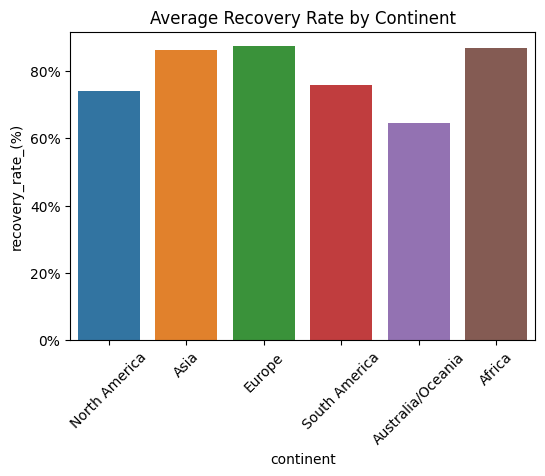

In [89]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='continent', y='recovery_rate_(%)',errorbar=None)
plt.title('Average Recovery Rate by Continent')
plt.xticks(rotation=45)
plt.yticks([0, 20, 40, 60, 80], ['0%', '20%', '40%', '60%', '80%'])
plt.show()

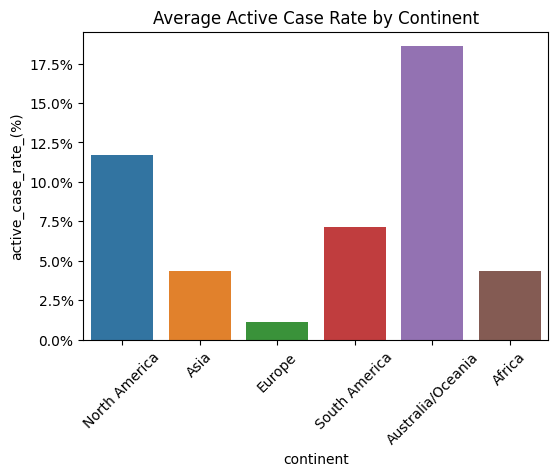

In [90]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='continent', y='active_case_rate_(%)',errorbar=None)
plt.title('Average Active Case Rate by Continent')
plt.yticks([0.0,2.5,5.0,7.5,10.0,12.5,15.0,17.5], ['0.0%','2.5%','5.0%', '7.5%', '10.0%','12.5%','15.0%','17.5%'])
plt.xticks(rotation=45)
plt.show()

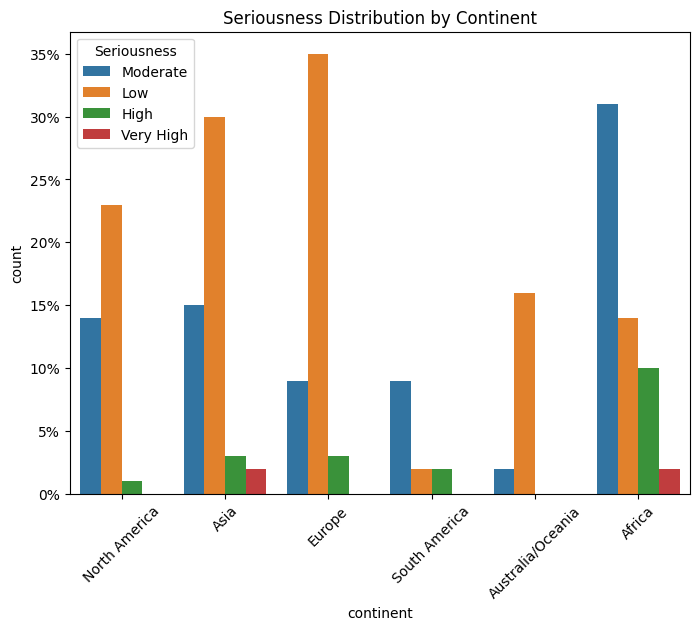

In [91]:
plt.figure(figsize=(8, 6))
plt.xticks(rotation=45)
sns.countplot(x='continent', hue='Seriousness', data=df)
plt.title('Seriousness Distribution by Continent')
plt.xticks(rotation=45)
plt.yticks([0,5,10,15,20,25,30,35], ['0%','5%','10%','15%','20%','25%','30%','35%'])

plt.show()